In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

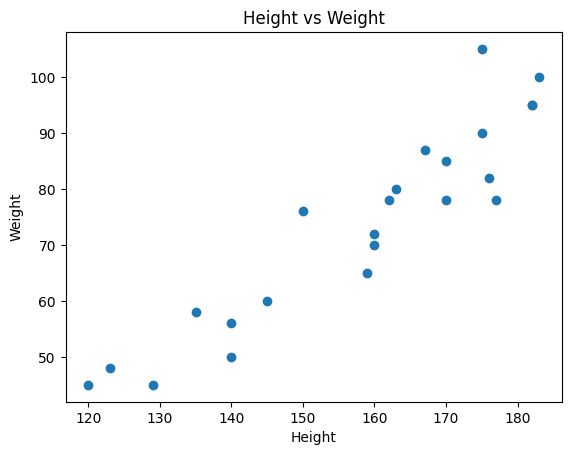

In [5]:
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

In [15]:
X = df[['Height']]
y = df['Weight']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [22]:
##Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

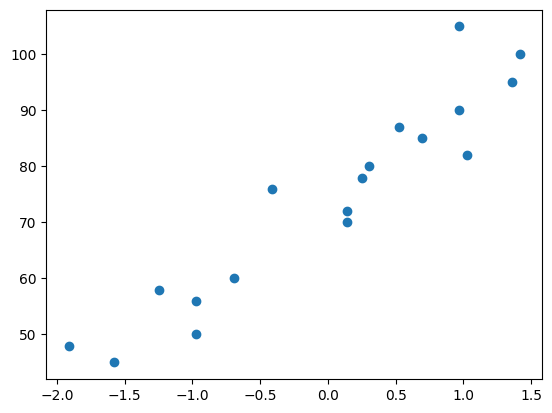

In [23]:
plt.scatter(X_train, y_train)

In [24]:
##Train the SLR 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
model.coef_, model.intercept_

(array([16.71556824]), np.float64(74.27777777777777))

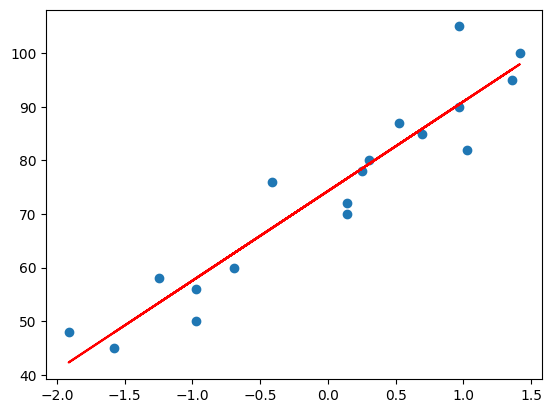

In [27]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red')

In [28]:
y_pred = model.predict(X_test)

In [30]:
y_pred,y

(array([92.36074777, 85.86942521, 39.50283548, 96.99740674, 75.66877547]),
 0      45
 1      58
 2      48
 3      60
 4      70
 5      78
 6      80
 7      90
 8      95
 9      78
 10     82
 11     95
 12    105
 13    100
 14     85
 15     78
 16     50
 17     65
 18     76
 19     87
 20     45
 21     56
 22     72
 Name: Weight, dtype: int64)

In [32]:
##Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae, mse,rmse
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')



Mean Absolute Error: 8.078703941181502
Mean Squared Error: 83.23803021031195
Root Mean Squared Error: 9.123487831433325


In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)   
r2

0.6981504561563971

In [34]:
#Display adjusted R²
1- (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5975339415418628